<a href="https://colab.research.google.com/github/SelvamRaju/AI-ML-Capstone-Project-NLP-Chatbot/blob/DiptiParmar23-patch-1/GL_Capstone_ChatBot_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NATURAL LANGUAGE PROCESSING - CAPSTONE PROJECT**

#**AIML-CHATBOT INTERFACE**

#**DOMAIN: Industrial safety. NLP based Chatbot**

• CONTEXT:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment

 DATA DESCRIPTION:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.
Columns description:
‣ Data: timestamp or time/date information
‣ Countries: which country the accident occurred (anonymised)
‣ Local: the city where the manufacturing plant is located (anonymised)
‣ Industry sector: which sector the plant belongs to
‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)
‣ Gender: if the person is male of female
‣ Employee or Third Party: if the injured person is an employee or a third party
‣ Critical Risk: some description of the risk involved in the accident
‣ Description: Detailed description of how the accident happened.

• PROJECT OBJECTIVE:
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description

#**‣ Input: Interim report**

#**Process: Step 1: Import the data**

In [1]:
#for reading data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 25.9 MB 830 kB/s
     |████████████████████████████████| 10.9 MB 3.9 MB/s 
     |████████████████████████████████| 596 kB 46.6 MB/s 
     |████████████████████████████████| 102 kB 10.7 MB/s 
     |████████████████████████████████| 675 kB 35.5 MB/s 
     |████████████████████████████████| 4.7 MB 35.1 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 812 kB 46.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=b415c8800ff9722acf7a89df04d36ab95218f6c15676e918f7000278edf6a7ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-61_1xn8t/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=6326abbade251f552760720b18a57baf421396bf274d3a92bfbf6f4174052bba
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

In [3]:
!pip install plotly --upgrade

     |████████████████████████████████| 27.7 MB 64.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [4]:
!pip install plotly-express

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import calendar

import warnings 
warnings.filterwarnings('ignore')

import plotly
print(plotly.__version__)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
#from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers,optimizers
from tensorflow.keras.layers import Activation,Dense
#from tensorflow.keras.layers import Activation,Dense
#from tensorflow.keras.models import load_model

#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras import regularizers, optimizers
#from tensorflow.keras.models import load_model

from pandas_profiling import ProfileReport

5.6.0


In [7]:
df_health=pd.read_csv("/content/drive/My Drive/AIML/Capstone Project Data/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
df_health.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [8]:
print("No. of Rows and Columns in Dataframe")
df_health.shape

No. of Rows and Columns in Dataframe


(425, 11)

In [9]:
print("No. of elements in Dataframe")
df_health.size

No. of elements in Dataframe


4675

In [10]:
prof = ProfileReport(df_health) 
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#**Step 2: Data cleansing**

In [11]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [12]:
df_health.isnull().values.any()

False

In [13]:
df_health.isna().values.any()

False

In [14]:
df_health.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [15]:
df_health.isna().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [16]:
df_health.duplicated().sum()

0

In [18]:
df_health.describe(include=['object'])

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
count,425,425,425,425,425,425,425,425,425,425
unique,287,3,12,3,5,6,2,3,33,411
top,2017-02-08 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,During the activity of chuteo of ore in hopper...
freq,6,251,90,241,316,143,403,189,232,3


In [19]:
#Dropping this column as it will be 1-1 mapping and not usefule while training or testing the model
df_health=df_health.drop('Unnamed: 0',axis=1)
df_health.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [20]:
# Rename 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in Data frame
df_health.rename(columns={'Data':'Date','Countries':'Country','Genre':'Gender','Employee or Third Party':'Employee Type'},inplace=True)
df_health.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


 # **Step 3: Data preprocessing**

In [21]:
print(df_health.Date.max())
print(df_health.Date.min())

2017-07-09 00:00:00
2016-01-01 00:00:00


The whole data set is between 1st January 2016 to 9th July 2017


In [22]:
df_health['Date']=pd.to_datetime(df_health['Date'])
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      425 non-null    datetime64[ns]
 1   Country                   425 non-null    object        
 2   Local                     425 non-null    object        
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    object        
 5   Potential Accident Level  425 non-null    object        
 6   Gender                    425 non-null    object        
 7   Employee Type             425 non-null    object        
 8   Critical Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


In [23]:
replace_values = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
df_health['Local'] = df_health['Local'].map(replace_values)
replace_values = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5}
df_health['Accident Level'] = df_health['Accident Level'].map(replace_values)
replace_values = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
df_health['Potential Accident Level'] = df_health['Potential Accident Level'].map(replace_values)
del replace_values

In [24]:
print(f'Dataset after adjusting categorical values\n')
df_health.head()

Dataset after adjusting categorical values



,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,1,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,2,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,3,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,4,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [25]:
df_health.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee Type               0
Critical Risk               0
Description                 0
dtype: int64

Accidents happen throughout the year added datetime features such as year,month and day.

In [26]:
df_health['Date'] = pd.to_datetime(df_health['Date'])
df_health['Year'] = df_health['Date'].apply(lambda x : x.year)
df_health['Month'] = df_health['Date'].apply(lambda x : x.month)
df_health['Day'] = df_health['Date'].apply(lambda x : x.day)
df_health['Weekday'] = df_health['Date'].apply(lambda x : x.day_name())
df_health['WeekofYear'] = df_health['Date'].apply(lambda x : x.weekofyear)
df_health.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,1,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-01-02,Country_02,2,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53
2,2016-01-06,Country_01,3,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1
3,2016-01-08,Country_01,4,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1


Dividing the year in quaters

In [27]:
def month_quarter_Conversion(x):
    if x in [10, 11, 12]:
        season = 'Fourth'
    elif x in [1, 2, 3]:
        season = 'First'
    elif x in [4, 5, 6]:
        season = 'Second'
    elif x in [7, 8, 9]:
        season = 'Third'
    return season
df_health['Quarter'] = df_health['Month'].apply(month_quarter_Conversion)
df_health.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Quarter
0,2016-01-01,Country_01,1,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,First
1,2016-01-02,Country_02,2,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,First
2,2016-01-06,Country_01,3,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,First
3,2016-01-08,Country_01,4,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,First
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,First


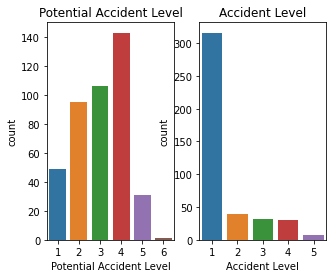

In [35]:
plt.figure(figsize=(5,4))
plt.subplot(1,2,1)
plt.title('Potential Accident Level')
sns.countplot(x='Potential Accident Level',data=df_health)

plt.subplot(1,2,2)
plt.title('Accident Level')
sns.countplot(x='Accident Level',data=df_health)

Text(0.5, 1.0, 'Potential Accident Level')

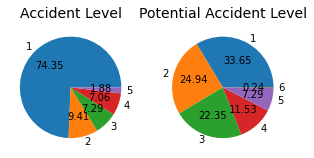

In [39]:
fig=plt.figure(figsize=(5,5))

ax1=fig.add_subplot(1,2,1)
plt.pie(x=df_health['Accident Level'].value_counts(),autopct='%.2f',labels=['1','2','3','4','5'])
plt.title('Accident Level',fontsize=14)

ax1=fig.add_subplot(1,2,2)
plt.pie(x=df_health['Potential Accident Level'].value_counts(),autopct='%.2f',labels=['1','2','3','4','5','6'])
plt.title('Potential Accident Level',fontsize=14)

In [40]:
#Dealing with categorical variable
#check for unique values in target varibale.
#It contains six values :
df_health['Potential Accident Level'].unique()

array([4, 3, 1, 2, 5, 6])

In [41]:
#check frequency distribution of target variable. 
#check whether data is balanced or imbalanced.
#It has 1 severe case and 49 not severe
df_health['Potential Accident Level'].value_counts()

4    143
3    106
2     95
1     49
5     31
6      1
Name: Potential Accident Level, dtype: int64

In [42]:
#We can check the imbalaned data by caluclating percentage of the classes
df_health['Potential Accident Level'].value_counts(normalize=True)

4    0.336471
3    0.249412
2    0.223529
1    0.115294
5    0.072941
6    0.002353
Name: Potential Accident Level, dtype: float64

In [43]:
df_health['Gender'].value_counts()

Male      403
Female     22
Name: Gender, dtype: int64

In [44]:
df_health['Industry Sector'].value_counts()

Mining    241
Metals    134
Others     50
Name: Industry Sector, dtype: int64

In [45]:
df_health['Employee Type'].value_counts()

Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee Type, dtype: int64

In [46]:
df_health['Accident Level'].value_counts()

1    316
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64

In [47]:
df_health['Critical Risk'].value_counts()

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Projection of fragments                        2
Machine Protection  

In [48]:
df_health['Country'].value_counts()

Country_01    251
Country_02    130
Country_03     44
Name: Country, dtype: int64

In [49]:
df_health['Local'].value_counts()

3     90
5     59
1     57
4     56
6     46
10    44
8     27
2     24
7     14
12     4
9      2
11     2
Name: Local, dtype: int64

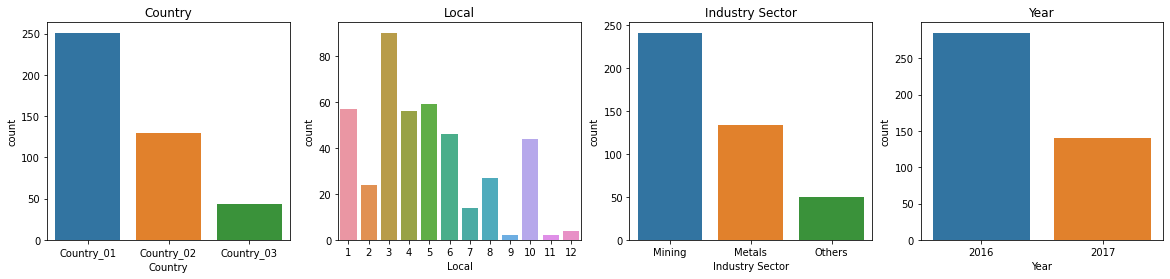

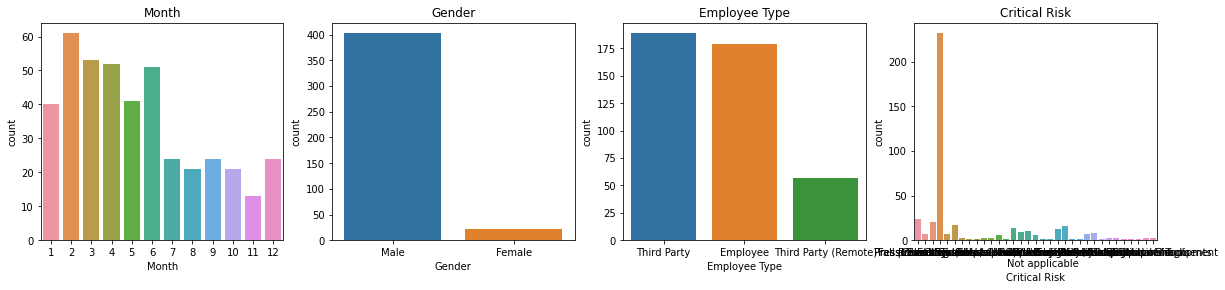

In [50]:
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.title("Country")
sns.countplot(x='Country',data=df_health)

plt.subplot(1,4,2)
plt.title("Local")
sns.countplot(x='Local',data=df_health)

plt.subplot(1,4,3)
plt.title("Industry Sector")
sns.countplot(x='Industry Sector',data=df_health)

plt.subplot(1,4,4)
plt.title("Year")
sns.countplot(x='Year',data=df_health)

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.title("Month")
sns.countplot(x='Month',data=df_health)

plt.subplot(1,4,2)
plt.title("Gender")
sns.countplot(x='Gender',data=df_health)

plt.subplot(1,4,3)
plt.title("Employee Type")
sns.countplot(x='Employee Type',data=df_health)

plt.subplot(1,4,4)
plt.title("Critical Risk")
sns.countplot(x='Critical Risk',data=df_health)

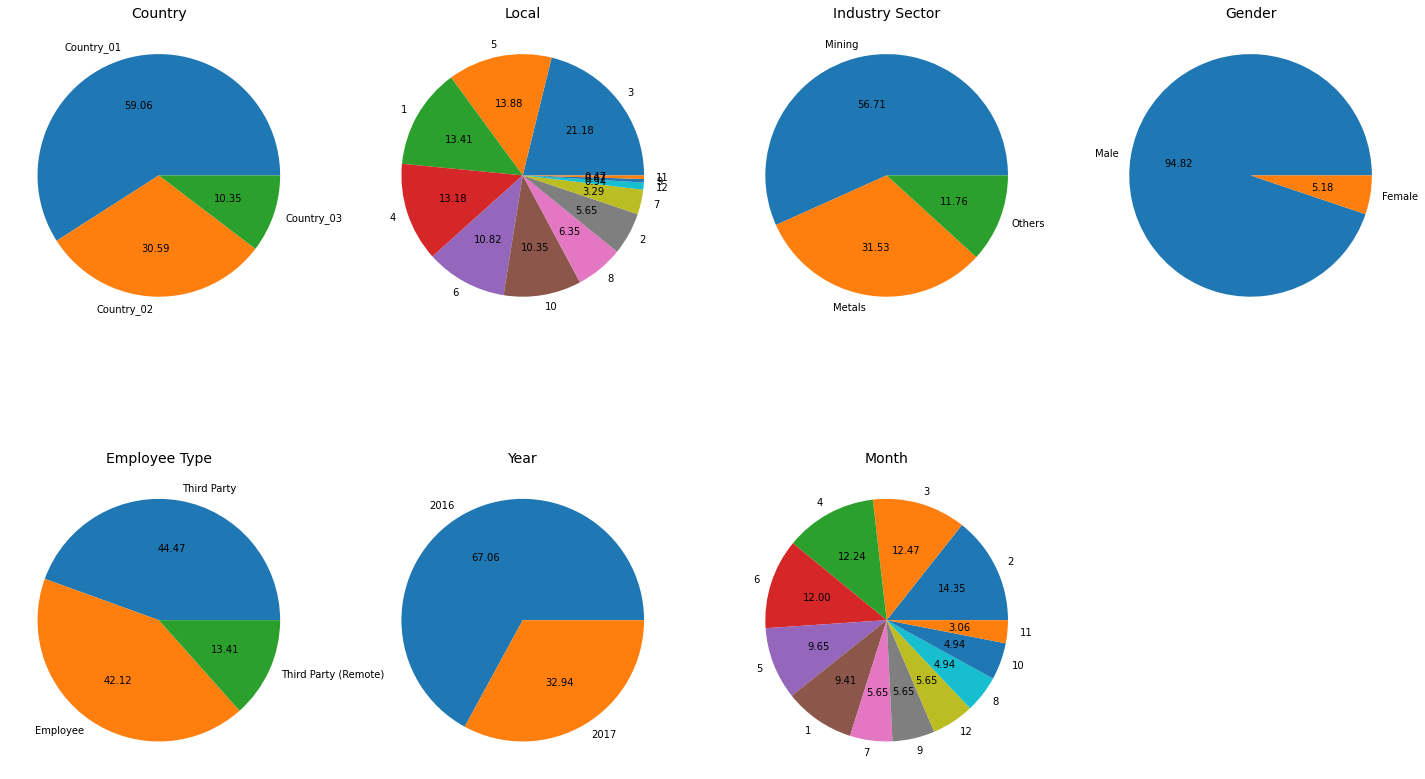

In [51]:
fig=plt.figure(figsize=(25,15))

ax1=fig.add_subplot(2,4,1)
plt.pie(x=df_health['Country'].value_counts(),autopct="%.2f",labels=df_health['Country'].value_counts().keys())
plt.title("origin Distribution",fontsize=14)
plt.title('Country',size=14)

ax2=fig.add_subplot(2,4,2)
plt.pie(x=df_health['Local'].value_counts(),autopct="%.2f",labels=df_health['Local'].value_counts().keys())
plt.title("origin Distribution",fontsize=14)
plt.title('Local',size=14)

ax3=fig.add_subplot(2,4,3)
plt.pie(x=df_health['Industry Sector'].value_counts(),autopct="%.2f",labels=df_health['Industry Sector'].value_counts().keys())
plt.title("origin Distribution",fontsize=14)
plt.title('Industry Sector',size=14)

ax4=fig.add_subplot(2,4,4)
plt.pie(x=df_health['Gender'].value_counts(),autopct="%.2f",labels=df_health['Gender'].value_counts().keys())
plt.title("origin Distribution",fontsize=14)
plt.title('Gender',size=14)

ax5=fig.add_subplot(2,4,5)
plt.pie(x=df_health['Employee Type'].value_counts(),autopct="%.2f",labels=df_health['Employee Type'].value_counts().keys())
plt.title("origin Distribution",fontsize=14)
plt.title("Employee Type",fontsize=14)

ax6=fig.add_subplot(2,4,6)
plt.pie(x=df_health['Year'].value_counts(),autopct="%.2f",labels=df_health['Year'].value_counts().keys())
plt.title("origin Distribution",fontsize=14)
plt.title('Year',size=14)

ax7=fig.add_subplot(2,4,7)
plt.pie(x=df_health['Month'].value_counts(),autopct="%.2f",labels=df_health['Month'].value_counts().keys())
plt.title("origin Distribution",fontsize=14)
plt.title('Month',size=14)

plt.show()

# Multivariate Analysis

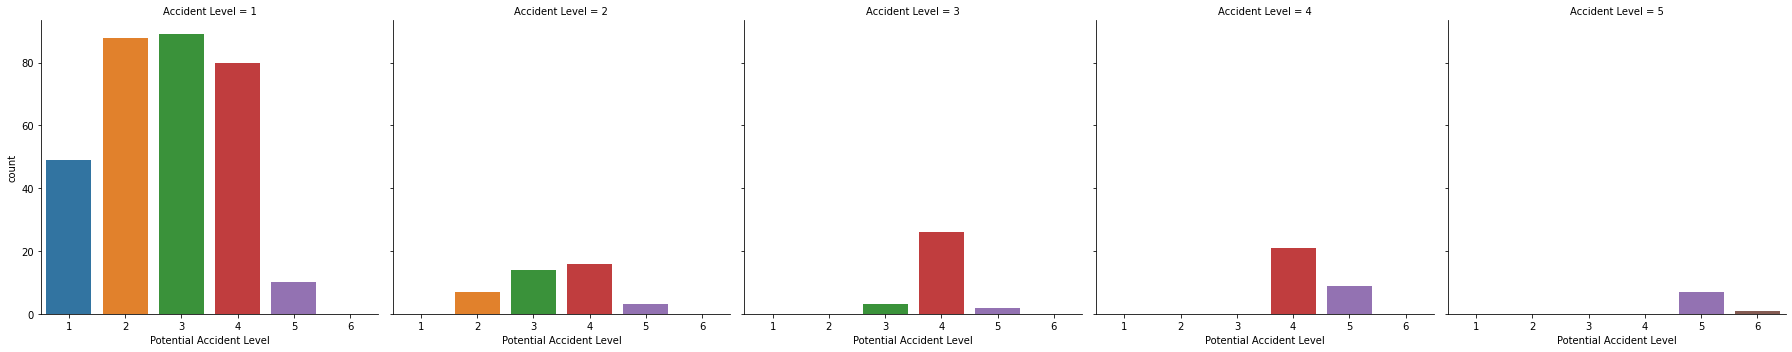

In [52]:
sns.catplot(data=df_health, x="Potential Accident Level",col="Accident Level",kind="count")

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

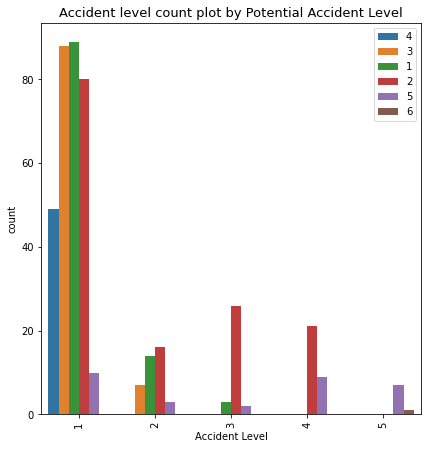

In [53]:
fig2 = plt.figure(figsize = (15, 7.2))
ax1 = fig2.add_subplot(122)
sns.countplot(x = "Accident Level", data = df_health, ax = ax1, orient = 'v',hue = 'Potential Accident Level').set_title("Accident Level".capitalize() +' count plot by Potential Accident Level',fontsize = 13)
plt.legend(labels = df_health['Potential Accident Level'].unique())
plt.xticks(rotation = 90)

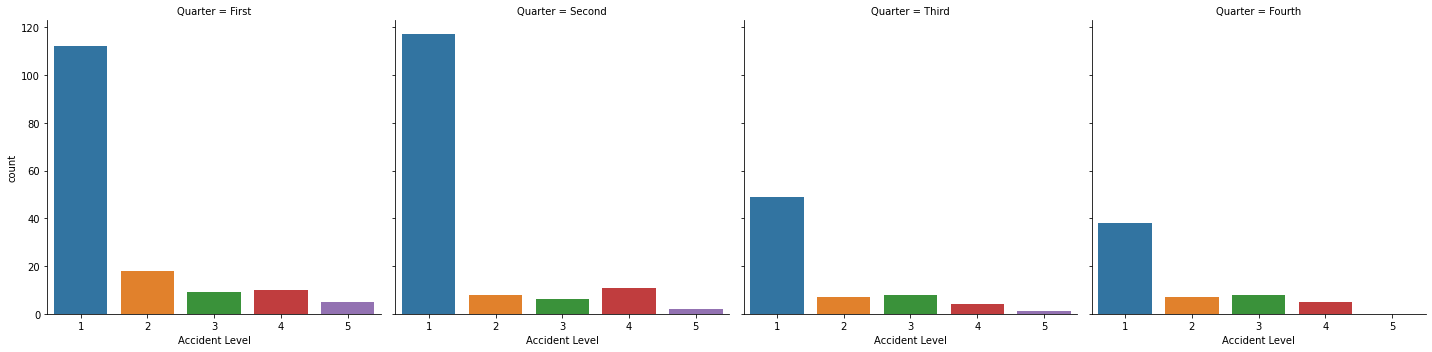

In [54]:
sns.catplot(data=df_health, x="Accident Level",col="Quarter",kind="count")

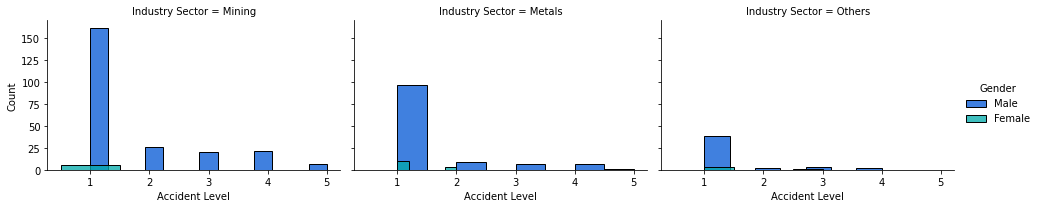

In [55]:

fig=sns.FacetGrid(df_health,aspect=1.5,palette="winter", hue='Gender',col='Industry Sector', legend_out=True)
fig.map(sns.histplot, 'Accident Level')
fig.add_legend()

In [56]:
# Define a common function to plot multivariate countplot
def plot_multi(df, col1, hue):
    fig = plt.figure(figsize = (8, 4))
    ax = fig.add_subplot(121)
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v',
                  hue = hue).set_title(col1.capitalize() +' count plot by '+ hue, 
                                                                      fontsize = 13)
    plt.legend(labels = df[hue].unique())
    #plt.xticks(rotation = 90)
    
    return plt.show()

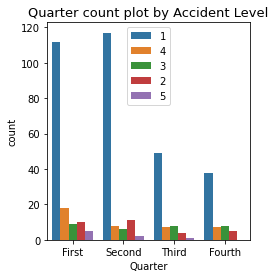

In [57]:
plot_multi(df_health, 'Quarter', 'Accident Level')

1.   Q2 had the highest Accident Level of severity-I. 
2.   No accidents have happened in the Q4

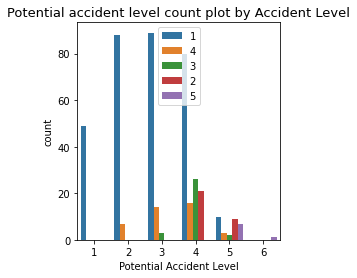

In [58]:
plot_multi(df_health, 'Potential Accident Level', 'Accident Level')

Always the actual Accident Level has been less than the potential one. So looks like there have been mitigation steps have been taken

#Analysis of Gender with Accident/ Potential Accident Level



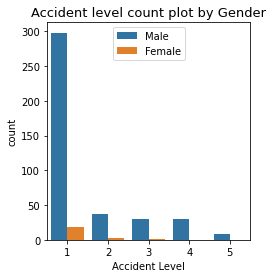

In [59]:
plot_multi(df_health,  "Accident Level",  'Gender')
# Looking at the graph below more male candidates are prone to accidents compared to females

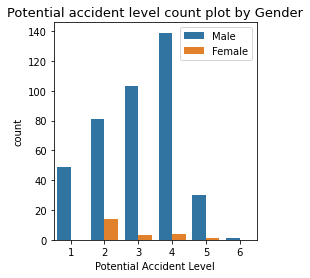

In [60]:
plot_multi(df_health,  "Potential Accident Level",  'Gender')
#Compared to graph below more male have higher potential accident levels compared to females

# Employee type vs Accident and Potential Accident Level analysis

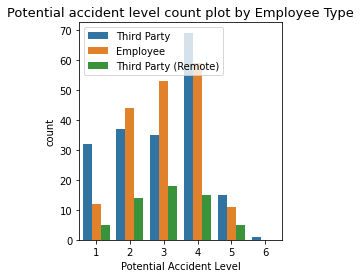

In [61]:
plot_multi(df_health,  "Potential Accident Level",  'Employee Type')
# Third Party(Onsite) working employees are more prone to potential accidents compared other two. 
# Third Party (Remote) working employees are less prone to potential accidents

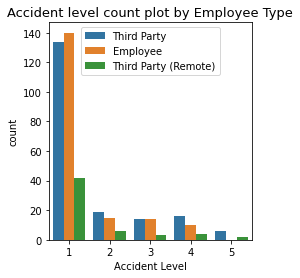

In [62]:
plot_multi(df_health,  "Accident Level",  'Employee Type')
# Employees (Full time) are more prone to accidents compared other two in Accident Severity level I (0).
# For rest of the Accident Severity levels, Third Party employees have hit into accidents, more than rest of the two employee categories on an average.
# Third Party (Remote) working employees are less prone to accidents

# Industry Sector vs Accident and Potential Accident Level analysis

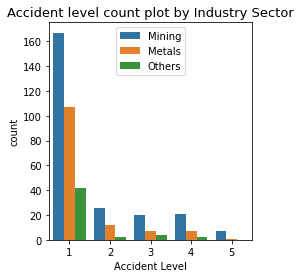

In [63]:
plot_multi(df_health,  "Accident Level",  'Industry Sector')
# Mining industry seems to have more accidents amongst all the other idustries
# Most critical severity incidents seems to have happened in Mining and Metal industries only

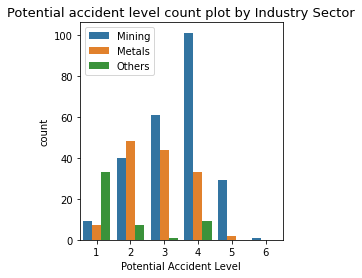

In [64]:
plot_multi(df_health,  "Potential Accident Level",  'Industry Sector')
# Mining industry seems to have more potential for Severity 4 accidents

# Country vs Accident Level analysis

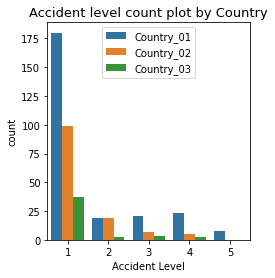

In [65]:
plot_multi(df_health,  "Accident Level",  'Country')
# Country 1 has highest levels of accidents that has happened in the past
#	The most fatal accidents have happened in Country 1 only.
#	Country 1 and 2 share the same number of Sev2 accidents


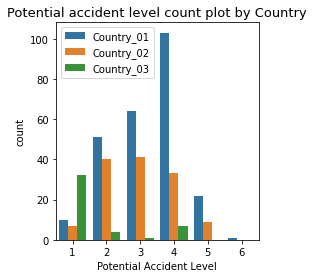

In [66]:
plot_multi(df_health,  "Potential Accident Level",  'Country')

# Accident's monthwise analysis

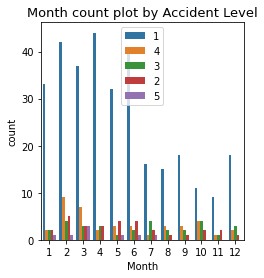

In [67]:
plot_multi(df_health,  "Month",  'Accident Level')
#•	Most of the accidents have happened in the initial 6 months. From July onwards the number and the severity has been reduced
#•	Hence this is an important field to influence the potential accident level
#•	None of the fatal accidents have happened from August onwards.

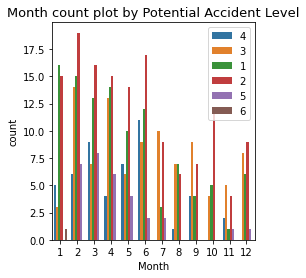

In [68]:
plot_multi(df_health,  "Month",  'Potential Accident Level')
#	Similarly , the potentials of accidents is higher in the first 6 months of the year.
#	Month of Feb shows the highest number of Sev 2 category accident’s potential.
#	Month plays an important role in Potential Accident target level prediction

# Accident's weekday wise analysis

In [69]:
def plot_multi_big(df, col1, hue):
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot()
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v',
                  hue = hue).set_title(col1.capitalize() +' count plot by '+ hue, 
                                                                      fontsize = 13)
    plt.legend(labels = df[hue].unique())
    plt.xticks(rotation = 90)
    
    return plt.show()

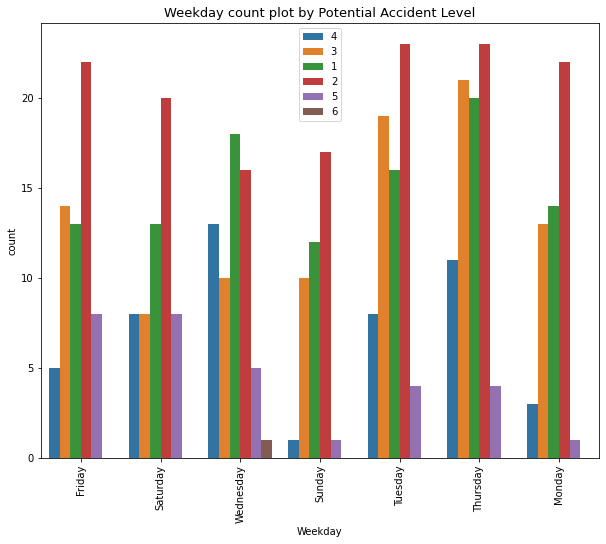

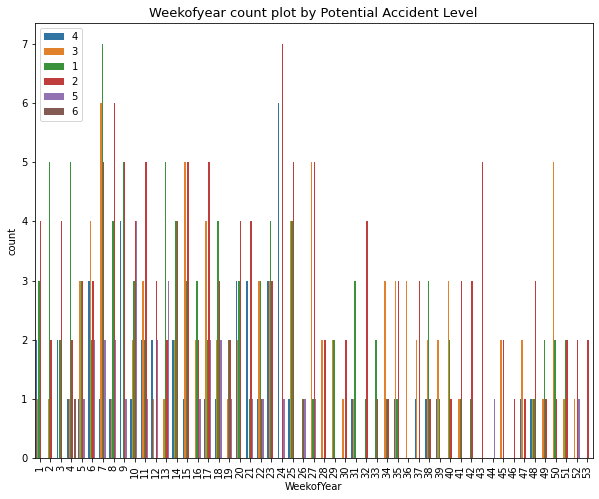

In [70]:
plot_multi_big(df_health,  "Weekday",  'Potential Accident Level')
#	There is less potential of Sev 5 accidents on Monday and Sunday.
#	The most fatal accidents can happen only on Wednesday. (Looking back at the data – there is only one record in the data sheet on 25th Jan 2017 i.e. Wednesday on which the Potential of accident severity was 5 
plot_multi_big(df_health,  "WeekofYear",  'Potential Accident Level')

# Country vs Employee type analysis

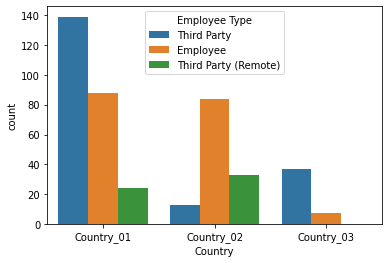

In [71]:
sns.countplot(x="Country", data=df_health, hue='Employee Type')
#Country 1 has most third party contractors
#Country 3 has very less full time employees and no third party remote workers
# Country 2 has very less Thirdparty workers working on site. Most number of full time employees 

# Analyze Country and Industry Sector

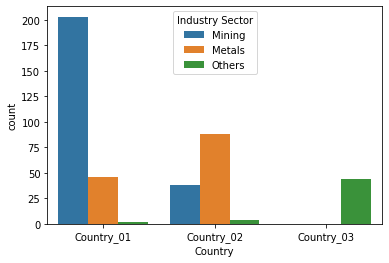

In [72]:


sns.countplot(x="Country", data=df_health, hue='Industry Sector')
#	Country 1 has the highest Mining industries compared to others. Also Mining industry has 56 % of accidents reported from the report. Thus no wonder if Country 1 has the highest number of incidents reported
#	Country 3 has no Mining and Metal industries. Other industries have 11 % of accidents. Country 3 has 10 % of accidents from the reported ones.

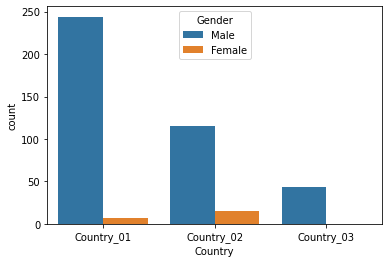

In [73]:
sns.countplot(x="Country", data=df_health,hue="Gender")
# In all the countries male workers are the most. Hence no wonder if the accidents are happening more for Males
#	Country 3 does not have any female worker belonging to the given industries

# Analyze Employee Type and Gender

> Indented block



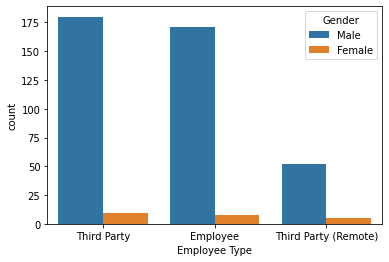

In [74]:
sns.countplot(x="Employee Type", data=df_health,hue="Gender")
#	In all the three employment categories there are more males and those are the most affected ones during these accidents

# Analyze the year , industry and more..

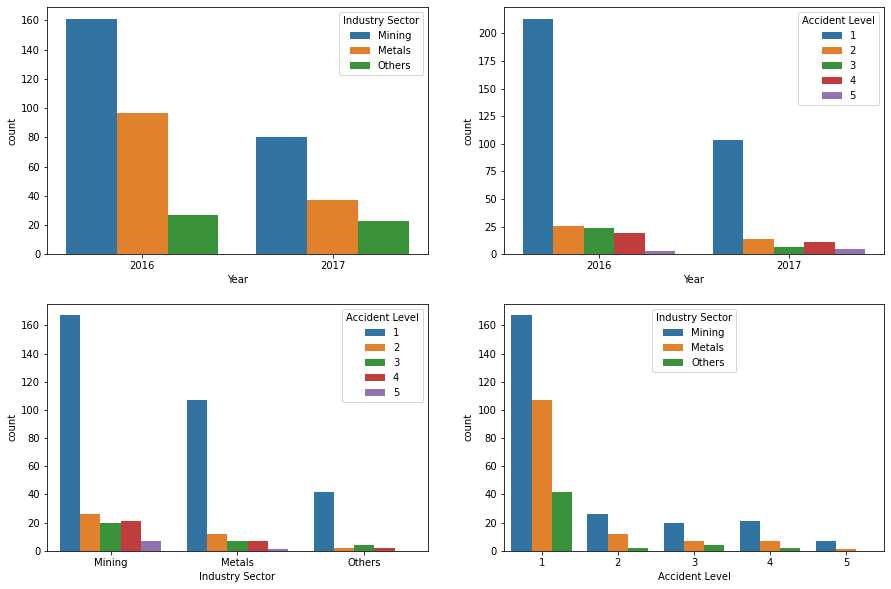

In [75]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.countplot(x=df_health['Year'],hue='Industry Sector',data=df_health,ax=axs[0][0])
sns.countplot(x=df_health['Year'],hue='Accident Level',data=df_health,ax=axs[0][1])
sns.countplot(x=df_health['Industry Sector'],hue='Accident Level',data=df_health,ax=axs[1][0])
sns.countplot(x=df_health['Accident Level'],hue='Industry Sector',data=df_health,ax=axs[1][1])

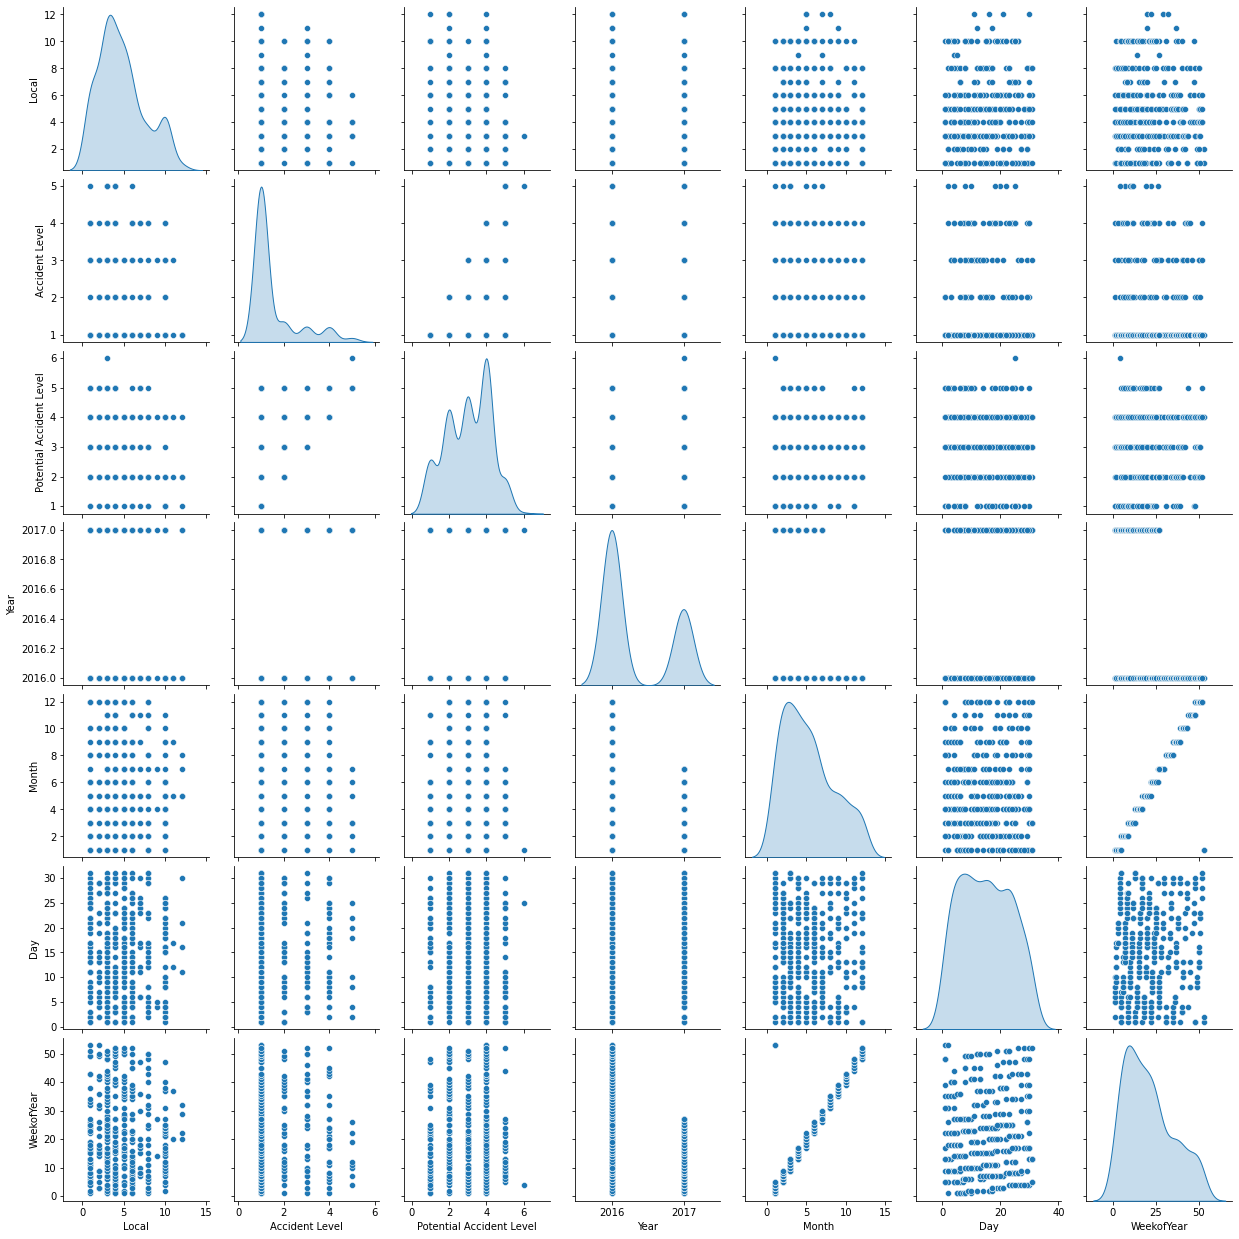

In [76]:
sns.pairplot(df_health,diag_kind='kde')

Observations:
    1. From above pair plots,we can see that many columns are correlated among them, this leads to multi-collinearity and many columns have long tail so that is the indication of outliers. 

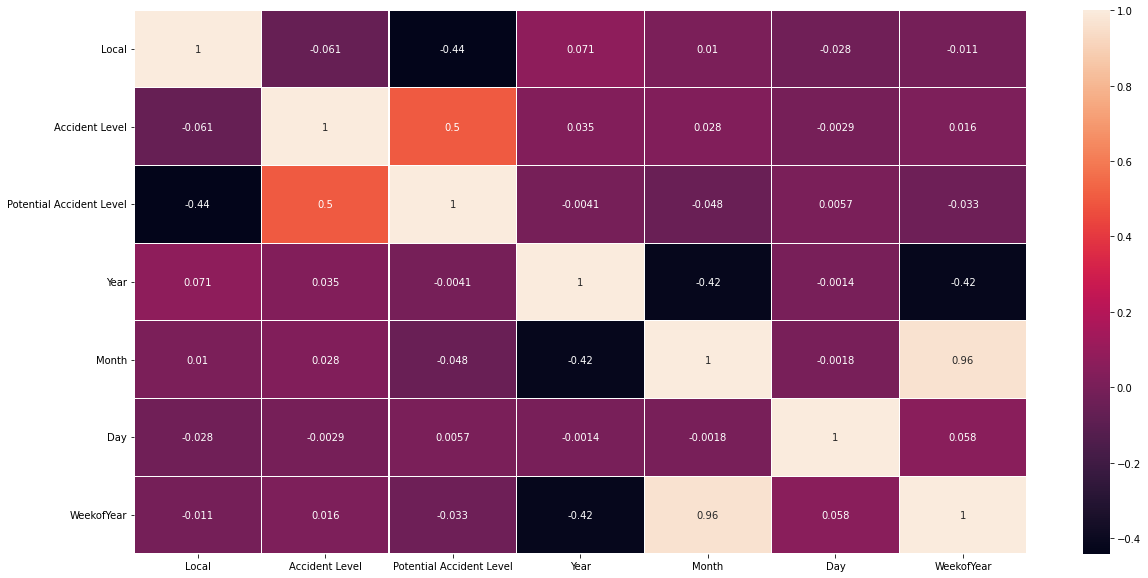

In [77]:
fig=plt.subplots(figsize=(20,10))
sns.heatmap(df_health.corr(),annot=True,linewidth=0.2)

In [78]:
corre_values_target=df_health.corr()['Potential Accident Level']
pd.DataFrame(corre_values_target.sort_values(ascending=False))

,Potential Accident Level
Potential Accident Level,1.000000
Accident Level,0.502704
Day,0.005721
Year,-0.004081
WeekofYear,-0.033401
Month,-0.047853
Local,-0.441603


# Analyze the description data

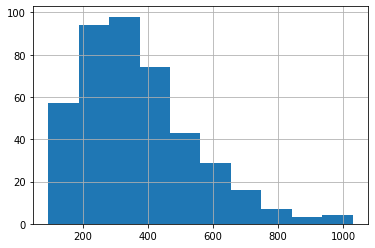

In [79]:
#Number of characters present in each description sentence

df_health['Description'].str.len().hist()

Average word length is as below

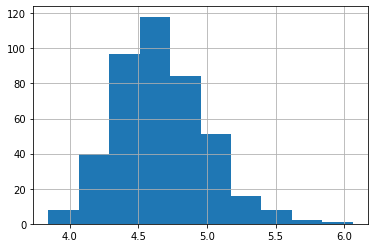

In [80]:
df_health['Description'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

#Stop word analysis

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def plot_top_stopwords_barchart(text):
    
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


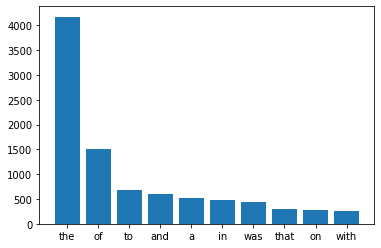

In [82]:
plot_top_stopwords_barchart(df_health['Description'])  

In [83]:
import re

import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud, STOPWORDS


In [84]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [85]:
df_health['Description'][0]

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

In [86]:
#Removing of stopwords and stemming

ps = PorterStemmer()
sentences = df_health['Description']
corpus = []
for i in range(len(sentences)):
    sentences_1 = nltk.sent_tokenize(sentences[i])

   #words =  [nltk.word_tokenize(sentence) for sentence in sentences_1]
    # Preprocessing the data
    review = re.sub(r'\[[0-9]*\]',' ',sentences[i])
    review = re.sub('[^a-zA-Z]', ' ', review)

    review = re.sub(r'\s+',' ',review)
    review = review.lower()
    review = re.sub(r'\d',' ',review)
    review = re.sub(r'\s+',' ',review)
    review = review.split()

    
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)



In [87]:
print(corpus[0])
#Look at stemming words e.g remov , mainten , proce etc are not making sense in this use case. Since this is chat bot application , we need more semantical  words

remov drill rod jumbo mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo


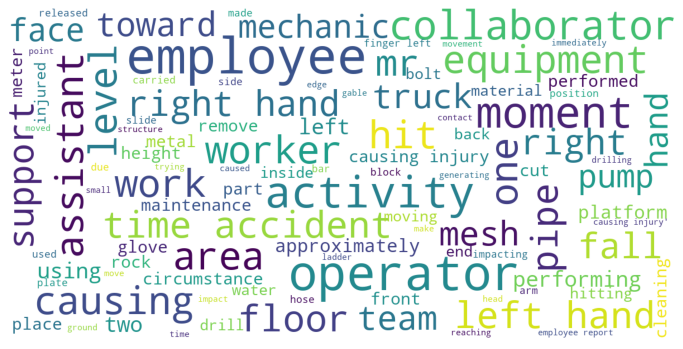

In [88]:
#Removing of stopwords and lemmatization

ps = PorterStemmer()
wordnet=WordNetLemmatizer()
sentences = df_health['Description']
corpus = []
for i in range(len(sentences)):
    # Preprocessing the data
    review = re.sub(r'\[[0-9]*\]',' ',sentences[i])
    review = re.sub('[^a-zA-Z]', ' ', review)

    review = re.sub(r'\s+',' ',review)
    review = review.lower()
    review = re.sub(r'\d',' ',review)
    review = re.sub(r'\s+',' ',review)
    review = review.split()

    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# To reconsider not removing few key stopewords e.g. Not , in etc.

wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
wordcloud=wordcloud.generate(str(corpus))

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
 
plt.imshow(wordcloud)
plt.show()

In [89]:
print(corpus)
#Look at lemmatized words e.g removing , maintenance , proceeds  etc are  making more sense now compared to stemming example above.

['removing drill rod jumbo maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tightens finger mechanic drilling bar beam jumbo', 'activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid immediately made use emergency shower directed ambulatory doctor later hospital note sulphide solution gram liter', 'sub station milpo located level collaborator excavation work pick hand tool hitting rock flat part beak bounce hitting steel tip safety shoe metatarsal area left foot collaborator causing injury', 'approximately nv cx ob personnel begin task unlocking soquet bolt bhb machine penultimate bolt identified hexagonal head worn proceeding mr crist bal auxiliary assistant climb platform exert pressure hand dado key prevent coming bolt moment two collaborator rotate lever anti clockwise direction leaving key bolt

In [90]:
len(corpus)

425

# N Gram analysis

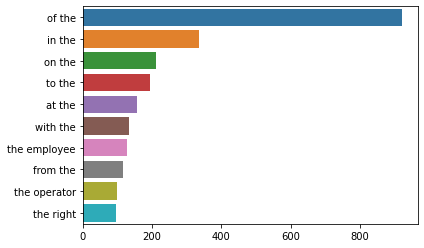

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
plot_top_ngrams_barchart(df_health['Description'],2)

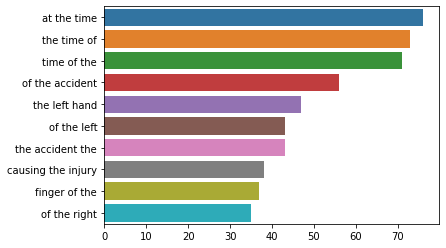

In [92]:
plot_top_ngrams_barchart(df_health['Description'],3)

# TFIDF Feature



In [93]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize,stem

feature_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=3000, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(corpus).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    feature_df = pd.concat([feature_df, tfs], axis=1)
feature_df = pd.concat([df_health, feature_df], axis=1)
feature_df.head(3)
X.shape

(425, 3000)

In [94]:
feature_df.head(3)


,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,...,TFIDF_zinc sheet adhered,TFIDF_zinc sheet cathode,TFIDF_zinc stuck enter,TFIDF_zinco rotary table,TFIDF_zn ingot struck,TFIDF_zn sheet lifting,TFIDF_zone intersection rpa,TFIDF_zone lifting container,TFIDF_zone moment bricklayer,TFIDF_zone supervise work
0,2016-01-01,Country_01,1,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,Country_02,2,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-01-06,Country_01,3,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


feature_df['Country'] = LabelEncoder().fit_transform(feature_df['Country']).astype(np.int8)
feature_df['Local'] = LabelEncoder().fit_transform(feature_df['Local']).astype(np.int8)
feature_df['Industry Sector'] = LabelEncoder().fit_transform(feature_df['Industry Sector']).astype(np.int8)
feature_df['Accident Level'] = LabelEncoder().fit_transform(feature_df['Accident Level']).astype(np.int8)
feature_df['Potential Accident Level'] = LabelEncoder().fit_transform(feature_df['Potential Accident Level']).astype(np.int8)
feature_df['Gender'] = LabelEncoder().fit_transform(feature_df['Gender']).astype(np.int8)
feature_df['Employee Type'] = LabelEncoder().fit_transform(feature_df['Employee Type']).astype(np.int8)
feature_df['Critical Risk'] = LabelEncoder().fit_transform(feature_df['Critical Risk']).astype(np.int8)
feature_df['Weekday'] = LabelEncoder().fit_transform(feature_df['Weekday']).astype(np.int8)
feature_df['Quarter'] = LabelEncoder().fit_transform(feature_df['Quarter']).astype(np.int8)
feature_df.drop(['Date','Description', 'Description'],axis=1,inplace=True)
feature_df.head(3)

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Year,Month,...,TFIDF_zinc sheet adhered,TFIDF_zinc sheet cathode,TFIDF_zinc stuck enter,TFIDF_zinco rotary table,TFIDF_zn ingot struck,TFIDF_zn sheet lifting,TFIDF_zone intersection rpa,TFIDF_zone lifting container,TFIDF_zone moment bricklayer,TFIDF_zone supervise work
0,0,0,1,0,3,1,1,20,2016,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,0,3,1,0,21,2016,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2,1,0,2,1,2,15,2016,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
corre_values_target=feature_df.corr()['Potential Accident Level']
TFIDF = pd.DataFrame(corre_values_target.sort_values(ascending=False))


In [98]:
print(TFIDF)

                          Potential Accident Level
Potential Accident Level                  1.000000
Accident Level                            0.502704
TFIDF_operator                            0.236865
TFIDF_block                               0.175690
TFIDF_height                              0.174325
...                                            ...
TFIDF_reaction                           -0.303132
TFIDF_allergic                           -0.311660
TFIDF_sting                              -0.319689
Country                                  -0.400094
Local                                    -0.441603

[8711 rows x 1 columns]


#Model training

##**• Perform train-test split**

In [205]:
X = feature_df.drop(['Accident Level','Potential Accident Level'], axis = 1) # Considering all Predictors
y = feature_df['Potential Accident Level']

In [206]:
#y=y.iloc[:1].values

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

Following is the shape of Features(X) and Labels(y) for Training and Testing

In [209]:
print(X_train.shape)
print(y_train.shape)

(340, 8709)
(340,)


In [210]:
print(X_test.shape)
print(y_test.shape)

(85, 8709)
(85,)


#**Model 1:Naive Bayes**

In [160]:
mnb = MultinomialNB()
NB_model = mnb.fit(X_train,y_train)
nb_y_pred=NB_model.predict(X_test)

In [161]:
NB_train_score=NB_model.score(X_train,y_train)
print(NB_train_score)
NB_test_score=NB_model.score(X_test,y_test)
print(NB_test_score)

0.3235294117647059
0.38823529411764707


In [162]:
NBacc=round(accuracy_score(y_test,nb_y_pred)*100,2)
print('Test Accuracy Score : % :',NBacc)
precNB=precision_score(y_test,nb_y_pred,average='micro')
print('Precision Score',precNB)
f1NB=f1_score(y_test,nb_y_pred,average='micro')
print('F1 Score :',f1NB)
recallNB=recall_score(y_test,nb_y_pred,average='micro')
print('Recall Score:',recallNB)

Test Accuracy Score : % : 38.82
Precision Score 0.38823529411764707
F1 Score : 0.38823529411764707
Recall Score: 0.38823529411764707


In [163]:
print(classification_report(y_test,nb_y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        14
           3       0.39      1.00      0.56        33
           4       0.00      0.00      0.00         3

    accuracy                           0.39        85
   macro avg       0.08      0.20      0.11        85
weighted avg       0.15      0.39      0.22        85



In [314]:
confusn_m_NB= confusion_matrix(y_test,nb_y_pred)
print(confusn_m_NB)

[[ 0  0  0 10  0]
 [ 0  0  0 25  0]
 [ 0  0  0 14  0]
 [ 0  0  0 33  0]
 [ 0  0  0  3  0]]


#**Model 2: Logistic Regression**

In [294]:
LoR1=LogisticRegression(solver='liblinear')
LoR1.fit(X_train,y_train)
y_pred_LoR1=LoR1.predict(X_test)

In [295]:
#Model score or accuracy of logistic regression model
LoR_train_score=LoR1.score(X_train,y_train)
print(LoR_train_score)

LoR_test_score=LoR1.score(X_test,y_test)
print(LoR_test_score)

0.9647058823529412
0.5764705882352941


In [297]:
LRacc=round(accuracy_score(y_test,y_pred_LoR1)*100,2)
print('Test Accuracy Score : % :',LRacc)
precLR=precision_score(y_test,y_pred_LoR1,average='micro')
print('Precision Score',precLR)
f1LR=f1_score(y_test,y_pred_LoR1,average='micro')
print('F1 Score :',f1LR)
recallLR=recall_score(y_test,y_pred_LoR1,average='micro')
print('Recall Score:',recallLR)

Test Accuracy Score : % : 57.65
Precision Score 0.5764705882352941
F1 Score : 0.5764705882352941
Recall Score: 0.5764705882352941


In [298]:
print(classification_report(y_test,y_pred_LoR1))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.75      0.36      0.49        25
           2       0.38      0.57      0.46        14
           3       0.62      0.73      0.67        33
           4       0.00      0.00      0.00         3

    accuracy                           0.58        85
   macro avg       0.47      0.49      0.46        85
weighted avg       0.59      0.58      0.56        85



In [315]:
confusn_m_LR = confusion_matrix(y_test,y_pred_LoR1)
print(confusn_m_LR)

[[ 8  0  1  1  0]
 [ 3  9  7  6  0]
 [ 0  0  8  6  0]
 [ 2  2  5 24  0]
 [ 0  1  0  2  0]]


#**Model 3:Random Forest**

In [167]:
RF_model=RandomForestClassifier()
RF_model.fit(X_train,y_train)
RF_pred=RF_model.predict(X_test)

In [168]:
RF_train_score=RF_model.score(X_train,y_train)
print(RF_train_score)
RF_test_score=RF_model.score(X_test,y_test)
print(RF_test_score)

0.9970588235294118
0.4588235294117647


In [171]:
RFacc=round(accuracy_score(y_test,RF_pred)*100,2)
print('Test Accuracy Score : % :',RFacc)
RFpre=precision_score(y_test,RF_pred,average='micro')
print('Precision Score',RFpre)
RF_f1=f1_score(y_test,RF_pred,average='micro')
print('F1 Score :',RF_f1)
RFrecall=recall_score(y_test,RF_pred,average='micro')
print('Recall Score:',RFrecall)

Test Accuracy Score : % : 45.88
Precision Score 0.4588235294117647
F1 Score : 0.4588235294117647
Recall Score: 0.4588235294117647


In [172]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.67      0.16      0.26        25
           2       0.29      0.43      0.34        14
           3       0.47      0.70      0.56        33
           4       0.00      0.00      0.00         3

    accuracy                           0.46        85
   macro avg       0.42      0.38      0.36        85
weighted avg       0.50      0.46      0.42        85



In [316]:
confusn_m_RF = confusion_matrix(y_test,RF_pred)
print(confusn_m_RF)

[[ 6  0  0  4  0]
 [ 1  4  8 12  0]
 [ 0  1  6  7  0]
 [ 2  1  7 23  0]
 [ 0  0  0  3  0]]


Overfitting Problem

#**Model 4: Random Forest with MinMaxScaler**

In [275]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(X_train)
X_train_MinMax=scaler.transform(X_train)
X_test_MinMax=scaler.transform(X_test)

In [277]:
RF2_SS_model=RandomForestClassifier()
RF2_SS_model.fit(X_train_MinMax,y_train)
RF2_minmax_pred=RF2_SS_model.predict(X_test_MinMax)

In [278]:
modelRF_SSTrain_Score=RF2_SS_model.score(X_train_MinMax,y_train)
modelRF_SSTest_Score=RF2_SS_model.score(X_test_MinMax,y_test)
print(modelRF_SSTrain_Score)
print(modelRF_SSTest_Score)

0.9970588235294118
0.43529411764705883


In [279]:
RF2_acc=round(accuracy_score(y_test,RF2_minmax_pred)*100,2)
print('Test Accuracy Score : % :',RF2_acc)
RF2_prec=precision_score(y_test,RF2_minmax_pred,average='micro')
print('Precision Score',RF2_prec)
RF2_f1=f1_score(y_test,RF2_minmax_pred,average='micro')
print('F1 Score :',RF2_f1)
RF2recall=recall_score(y_test,RF2_minmax_pred,average='micro')
print('Recall Score:',RF2recall)

Test Accuracy Score : % : 43.53
Precision Score 0.43529411764705883
F1 Score : 0.4352941176470588
Recall Score: 0.43529411764705883


In [280]:
print(classification_report(y_test,RF2_minmax_pred))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.67      0.24      0.35        25
           2       0.19      0.36      0.24        14
           3       0.50      0.64      0.56        33
           4       0.00      0.00      0.00         3

    accuracy                           0.44        85
   macro avg       0.41      0.35      0.35        85
weighted avg       0.50      0.44      0.43        85



In [317]:
confusn_m_RFwithScaling = confusion_matrix(y_test,RF2_minmax_pred)
print(confusn_m_RFwithScaling)

[[ 5  0  1  4  0]
 [ 1  6 10  8  0]
 [ 0  2  5  7  0]
 [ 1  1 10 21  0]
 [ 0  0  1  2  0]]


#**Model 5: NN model- Sequential with Batchnormalisation**

In [284]:
def create_batchnor_model():
    model_nn=tf.keras.models.Sequential()

    model_nn.add(Dense(50,input_shape=(8709,)))
    model_nn.add(tf.keras.layers.BatchNormalization())
    model_nn.add(Activation('relu'))

    model_nn.add(Dense(50))
    model_nn.add(tf.keras.layers.BatchNormalization())
    model_nn.add(Activation('relu'))

    model_nn.add(Dense(50))
    model_nn.add(tf.keras.layers.BatchNormalization())
    model_nn.add(Activation('relu'))

    model_nn.add(Dense(50))
    model_nn.add(tf.keras.layers.BatchNormalization())
    model_nn.add(Activation('relu'))

    model_nn.add(Dense(1))
    model_nn.add(Activation('softmax'))

    sgd=optimizers.SGD(lr=0.001)
    model_nn.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

    return model_nn

In [285]:
model_nn=create_batchnor_model()
history_nn=model_nn.fit(X_train,y_train,batch_size=100,epochs=5,verbose=0)

In [287]:
train_result_nn=model_nn.evaluate(X_train,y_train)
print('Train loss:',train_result_nn[0])
print('Train Accuracy:',train_result_nn[1])

11/11 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.2059
Train loss: 0.0
Train Accuracy: 0.20588235557079315


In [288]:
test_result_nn=model_nn.evaluate(X_test,y_test)
print('Train loss:',test_result_nn[0])
print('Train Accuracy:',test_result_nn[1])

3/3 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.2941
Train loss: 0.0
Train Accuracy: 0.29411765933036804


In [303]:
y_pred_nn=model_nn.predict(X_test)

In [306]:
NN_acc=round(accuracy_score(y_test,y_pred_nn)*100,2)
print('Test Accuracy Score : % :',NN_acc)
NN_prec=precision_score(y_test,y_pred_nn,average='micro')
print('Precision Score',NN_prec)
NN_f1=f1_score(y_test,y_pred_nn,average='micro')
print('F1 Score :',NN_f1)
NNrecall=recall_score(y_test,y_pred_nn,average='micro')
print('Recall Score:',NNrecall)

Test Accuracy Score : % : 29.41
Precision Score 0.29411764705882354
F1 Score : 0.29411764705882354
Recall Score: 0.29411764705882354


In [308]:
print(classification_report(y_test,y_pred_nn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.29      1.00      0.45        25
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00         3

    accuracy                           0.29        85
   macro avg       0.06      0.20      0.09        85
weighted avg       0.09      0.29      0.13        85



In [318]:
confusn_m_NN= confusion_matrix(y_test,y_pred_nn)
print(confusn_m_NN)

[[ 0 10  0  0  0]
 [ 0 25  0  0  0]
 [ 0 14  0  0  0]
 [ 0 33  0  0  0]
 [ 0  3  0  0  0]]


In [289]:
model_nn.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 50)                435500    
                                                                 
 batch_normalization_12 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                                 
 activation_30 (Activation)  (None, 50)                0         
                                                                 
 dense_44 (Dense)            (None, 50)                2550      
                                                                 
 batch_normalization_13 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                                 
 activation_31 (Activation)  (None, 50)              

In [312]:
models=pd.DataFrame({'Model':['Naive Bayes','Logistic Regression','Random Forest','Random Forest with MinMaxScaler','NN-Sequential'],
                   'Training Accuracy Score':[NB_train_score,LoR_train_score,RF_train_score,modelRF_SSTrain_Score,train_result_nn[1]],
                    'Testing Accuracy Score':[NB_test_score,LoR_test_score,RF_test_score,modelRF_SSTest_Score,test_result_nn[1]],
                    'Test Prediction Score':[NBacc,LRacc,RFacc,RF2_acc,NN_acc]})
models.sort_index()

,Model,Training Accuracy Score,Testing Accuracy Score,Test Prediction Score
0,Naive Bayes,0.323529,0.388235,38.82
1,Logistic Regression,0.964706,0.576471,57.65
2,Random Forest,0.997059,0.458824,45.88
3,Random Forest with MinMaxScaler,0.997059,0.435294,43.53
4,NN-Sequential,0.205882,0.294118,29.41


Summary Observations needto be addded###################

In [319]:
models=pd.DataFrame({'Model':['Naive Bayes','Logistic Regression','Random Forest','Random Forest with MinMaxScaler','NN-Sequential'],
                   'Confusion Matrix':[confusn_m_NB,confusn_m_LR,confusn_m_RF,confusn_m_RFwithScaling,confusn_m_NN]})
models.sort_index()

,Model,Confusion Matrix
0,Naive Bayes,"[[0, 0, 0, 10, 0], [0, 0, 0, 25, 0], [0, 0, 0,..."
1,Logistic Regression,"[[8, 0, 1, 1, 0], [3, 9, 7, 6, 0], [0, 0, 8, 6..."
2,Random Forest,"[[6, 0, 0, 4, 0], [1, 4, 8, 12, 0], [0, 1, 6, ..."
3,Random Forest with MinMaxScaler,"[[5, 0, 1, 4, 0], [1, 6, 10, 8, 0], [0, 2, 5, ..."
4,NN-Sequential,"[[0, 10, 0, 0, 0], [0, 25, 0, 0, 0], [0, 14, 0..."


###**• Select the final best trained model along with your detailed comments for selecting this model.**

Observations: 1.From above accuracy and confusion matrix table, we can say that Logistic Regression is the best model. Because it shows good accuracy score for traing and testing. 
2. RandomForest is equally good but it shows overfitting problem with training score.
3. We compared the confusion matrix,recall, precision, f1 score of both and made a conclusion that Logistic Regression is the best model for this problem. So, we decided to pickle the Logistic Regression model.

#**• Pickle the selected model for future use.**

In [324]:
import pickle
pkl_filename="Pickle_LR_Model.pkl"
with open(pkl_filename,'wb')as file:
    pickle.dump(LoR1,file)

###**• Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results.**

In [325]:
with open(pkl_filename,'rb') as file:
    Pickled_LR_Model=pickle.load(file)
Pickled_LR_Model

LogisticRegression(solver='liblinear')